In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
import string
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [10]:
#Reading the Data
test_data=pd.read_csv(r'D:\Portfolio projects\NLP\Corona_NLP_test.csv',encoding='latin-1')
train_data=pd.read_csv(r'D:\Portfolio projects\NLP\Corona_NLP_train.csv',encoding='latin-1')

In [11]:
train_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [12]:
test_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [13]:
train_data['Location'].head(50)

0                          London
1                              UK
2                       Vagabonds
3                             NaN
4                             NaN
5       ÃT: 36.319708,-82.363649
6            35.926541,-78.753267
7                         Austria
8                 Atlanta, GA USA
9                BHAVNAGAR,GUJRAT
10                 Makati, Manila
11      Pitt Meadows, BC, Canada 
12                     Horningsea
13                    Chicago, IL
14                            NaN
15                 Houston, Texas
16                   Saudi Arabia
17                Ontario, Canada
18                  North America
19                     Denver, CO
20           southampton soxx xxx
21                         Global
22                            NaN
23                            NaN
24               Downstage centre
25                         London
26                 Ketchum, Idaho
27            Everywhere You Are!
28                   New York, NY
29            

In [14]:
train_data.shape

(41157, 6)

In [54]:
train_data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are total 8590 observations having missing location cells

In [53]:
test_data.shape

(3798, 6)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [17]:
#lets look at the country wise tweets counts 
train_data['Location'] = train_data['Location'].str.replace('NYC', 'USA')
train_data['Location'] = train_data['Location'].str.replace('United States', 'USA')
train_data['Location'] = train_data['Location'].str.replace('London', 'UK')
train_data['Location'] = train_data['Location'].str.replace('NYC', 'USA')
train_data['Location'] = train_data['Location'].str.replace('London,England', 'UK')
train_data['Location'] = train_data['Location'].str.replace('New York,NY', 'USA')
train_data['Location'] = train_data['Location'].str.replace('Washington,DC', 'USA')
train_data['Location'] = train_data['Location'].str.replace('Los Angeles,CA', 'USA')
train_data['Location'] = train_data['Location'].str.replace('UK,England', 'UK')
train_data['Location'] = train_data['Location'].str.replace('United Kingdom', 'UK')

   

In [18]:
train_data['Location'].head(50)

0                              UK
1                              UK
2                       Vagabonds
3                             NaN
4                             NaN
5       ÃT: 36.319708,-82.363649
6            35.926541,-78.753267
7                         Austria
8                 Atlanta, GA USA
9                BHAVNAGAR,GUJRAT
10                 Makati, Manila
11      Pitt Meadows, BC, Canada 
12                     Horningsea
13                    Chicago, IL
14                            NaN
15                 Houston, Texas
16                   Saudi Arabia
17                Ontario, Canada
18                  North America
19                     Denver, CO
20           southampton soxx xxx
21                         Global
22                            NaN
23                            NaN
24               Downstage centre
25                             UK
26                 Ketchum, Idaho
27            Everywhere You Are!
28                   New York, NY
29            

In [19]:
#now let's remove Nan
# train_data['Location']=train_data['Location'].fillna(0)

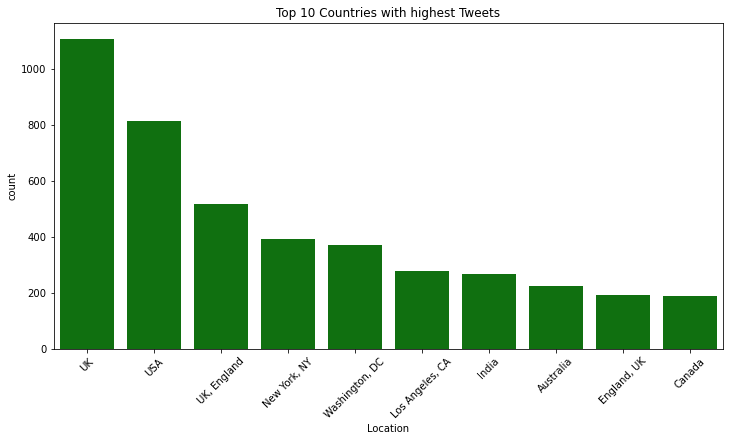

In [65]:
#Top 10 Countries that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_data, order=train_data['Location'].value_counts().index[:10],color='green')

sns.color_palette()
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

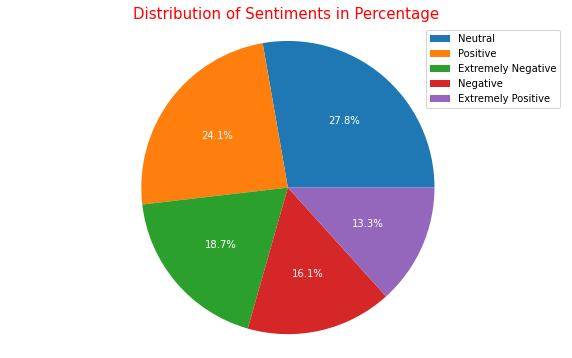

In [66]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.title("Distribution of Sentiments in Percentage",size=15 , color = 'Red')
plt.axis('equal')
plt.show()

In [22]:
#here we will remove some unnecessary word so that we can make good visuals of word cloud
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r'http', r'', regex=True)
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r't', r'', regex=True)
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r'co', r'', regex=True)
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r's', r'', regex=True)
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r'o', r'', regex=True)
train_data['OriginalTweet'] = train_data['OriginalTweet'].replace(r'ha', r'', regex=True)



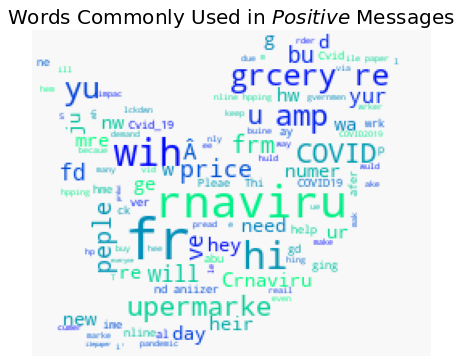

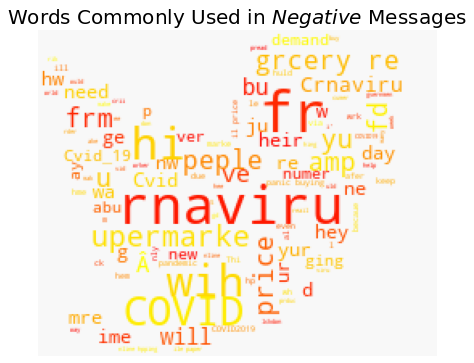

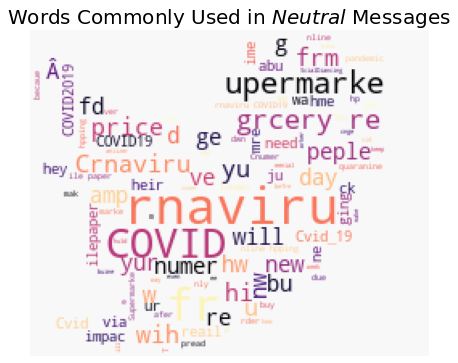

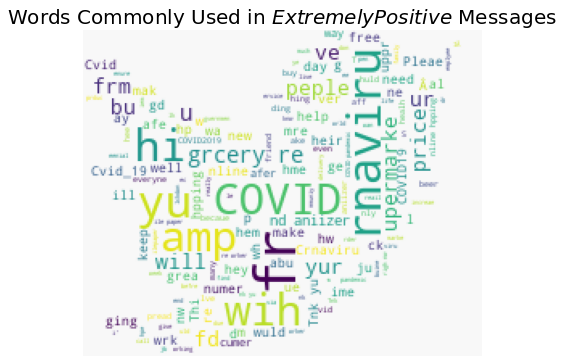

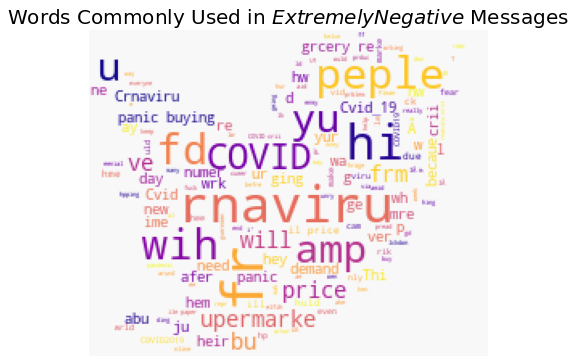

In [24]:
#WordCloud for the Sentiments
from wordcloud import WordCloud, STOPWORDS
# from nltk.corpus import stopwords
from PIL import Image
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train_data.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
  
    stopwords = set(STOPWORDS)
    more_stopwords = {'f', 'n', 'r'}
    stopwords = stopwords.union(more_stopwords)
    plt.figure(figsize=(10, 6))
    mask_1 = np.array(Image.open('ht1.jpg'))
    wc = WordCloud(width=1000,stopwords=stopwords,height=600, background_color="#f8f8f8", colormap=cmap,mask=mask_1)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
#     plt.savefig("ht.jpeg", format="png")
    plt.show()

# Feature selection

In [25]:

#Only intrested in the OriginalTweet and Sentiment Columns
train_df= train_data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gan @Chriiv ://./iFz9FAn2Pa an...,Neutral
1,advice Talk yur neighbur family excnge phne ...,Positive
2,"Crnaviru Auralia: Wlwrh give elderly, diabled...",Positive
3,My fd ck i n he nly ne which i empy...\r\r\n\r...,Positive
4,"Me, ready g a upermarke during he #COVID19 ub...",Extremely Negative


# Preprocessing

In [26]:
#Checking for null values
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [27]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [28]:
#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])

train_df.head()

C:\Users\harsh\AppData\Local\Temp/ipykernel_29280/1770967691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
C:\Users\harsh\AppData\Local\Temp/ipykernel_29280/1770967691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])


,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gan @Chriiv ://./iFz9FAn2Pa an...,Neutral,1
1,advice Talk yur neighbur family excnge phne ...,Positive,2
2,"Crnaviru Auralia: Wlwrh give elderly, diabled...",Positive,2
3,My fd ck i n he nly ne which i empy...\r\r\n\r...,Positive,2
4,"Me, ready g a upermarke during he #COVID19 ub...",Extremely Negative,0


In [29]:
#let's check stopwords in nltk library
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    #remove links starting with http
    text1 = re.sub(r'http\S+', ' ', text)
    #remove digits
    text2 = re.sub(r'\d+',' ', text1)
    tokens = re.split('\W+', text2)
    text = [word for word in tokens if word not in stopwords]
    return text
    

In [32]:
print(clean_text(text))

['ready', 'g', 'upermarke', 'covid', 'ubreak', 'n', 'becaue', 'im', 'paranid', 'bu', 'becaue', 'fd', 'ck', 'lieraly', 'empy', 'rnaviru', 'eriu', 'hing', 'bu', 'pleae', 'dn', 'panic', 'caue', 'hrage', 'crnavirufrance', 'reezchezvu', 'sayahme', 'nfinemen', 'umualq', 'n', 'wih', 'nain', 'inficed', 'wih', 'vid', 'wrld', 'mu', 'n', 'play', 'fair', 'wih', 'china', 'gvermen', 'mu', 'demand', 'china', 'adp', 'new', 'guilde', 'line', 'n', 'fd', 'afy', 'chinee', 'gvermen', 'guily', 'f', 'irpncible', 'wih', 'life', 'n', 'glbal', 'cale', 'thi', 'mrning', 'eed', 'piive', 'fr', 'cvid', 'feel', 'k', 'n', 'ympm', 'far', 'bu', 'ilaed', 'ince', 'fund', 'u', 'abu', 'pible', 'expure', 'viru', 'say', 'hme', 'peple', 'pragmaic', 'keep', 'yu', 'updaed', 'n', 'hw', 'iâ', 'ding', 'n', 'panic', 'lg', 'hvmzglz', 'sealoftheend', 'sn', 'wih', 'dwindling', 'upplie', 'unlawful', 'panicky', 'peple', 'breaking', 'cled', 'sre', 'amp', 'supermarke', 'raid', 'hem', 'hey', 'nrmally', 'crii', 'maive', 'crnaviru', 'sckupamp

In [33]:
train_df['OriginalTweetClean'] = train_df['OriginalTweet'].apply(lambda x: clean_text(x))
test_df['OriginalTweetClean'] = test_df['OriginalTweet'].apply(lambda x: clean_text(x))

train_df.head()

C:\Users\harsh\AppData\Local\Temp/ipykernel_29280/485385149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['OriginalTweetClean'] = train_df['OriginalTweet'].apply(lambda x: clean_text(x))
C:\Users\harsh\AppData\Local\Temp/ipykernel_29280/485385149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['OriginalTweetClean'] = test_df['OriginalTweet'].apply(lambda x: clean_text(x))


,OriginalTweet,Sentiment,SentimentMapped,OriginalTweetClean
0,@MeNyrbie @Phil_Gan @Chriiv ://./iFz9FAn2Pa an...,Neutral,1,"[menyrbie, philgan, chriiv, ifz, fan, pa, xx, ..."
1,advice Talk yur neighbur family excnge phne ...,Positive,2,"[advice, talk, yur, neighbur, family, excnge, ..."
2,"Crnaviru Auralia: Wlwrh give elderly, diabled...",Positive,2,"[crnaviru, auralia, wlwrh, give, elderly, diab..."
3,My fd ck i n he nly ne which i empy...\r\r\n\r...,Positive,2,"[fd, ck, n, nly, ne, empy, please, dn, panic, ..."
4,"Me, ready g a upermarke during he #COVID19 ub...",Extremely Negative,0,"[ready, g, upermarke, covid, ubreak, n, becaue..."


In [34]:
X_train = train_df['OriginalTweetClean']
X_test = test_df['OriginalTweetClean']

y_train = train_df['SentimentMapped']
y_test = test_df['SentimentMapped']

In [35]:
# OneHot Encoding the target column
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

y_test.head()

,0,1,2
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0


In [36]:
#The maximum number of words to be used(most frequent)
MAX_NB_WORDS = 10000
#Max number of words in each Tweet
MAX_SEQUENCE_LENGTH = 100


# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ')
tokenizer.fit_on_texts(X_train)

In [37]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq[10]

[200,
 2,
 3750,
 12,
 20,
 239,
 792,
 1533,
 140,
 547,
 250,
 264,
 117,
 38,
 306,
 298,
 2278,
 5088,
 2,
 771,
 12,
 97,
 32,
 4178,
 7]

In [38]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq,44)
X_test_seq_padded = pad_sequences(X_test_seq,44)

X_train_seq_padded[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  475,
       3875,   19, 1581,  229, 2417,  718,  339,  865,  463,  315,   11,
        718,  339,    1, 1581,  522, 1781, 2135, 1857,   87,   39,   29,
        894,   52, 2933,  168,    1,  836, 2209,   28,    2,   79,  130])

In [39]:
print('X_train_seq_padded:', X_train_seq_padded.shape)
print('X_test_seq_padded:', X_test_seq_padded.shape)

print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train_seq_padded: (41157, 44)
X_test_seq_padded: (3798, 44)
y_train: (41157, 3)
y_test: (3798, 3)


# Model Building

In [ ]:
pip install numpy --upgrade

In [40]:
model=Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=64, input_length=X_train_seq_padded.shape[1]))
# Input_dim: Size of the vocabulary.
# Output_dim: Dimension of the dense embedding.

model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 64)            640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 44, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 44, 128)           98816     
                                                                 
 lstm_1 (LSTM)               (None, 44, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                        

In [41]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Adding an early stopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=4, #Stop the model training if the validation accuracy doesnt increase in 4 consecutive Epochs
                   restore_best_weights=True)

In [42]:
# Fit the model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10, callbacks =[es],
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
1287/1287 [==============================] - 224s 167ms/step - loss: 0.8165 - accuracy: 0.6204 - val_loss: 0.8903 - val_accuracy: 0.5985
Epoch 2/10
1287/1287 [==============================] - 241s 188ms/step - loss: 0.5273 - accuracy: 0.8073 - val_loss: 0.8997 - val_accuracy: 0.6488
Epoch 3/10
1287/1287 [==============================] - 251s 195ms/step - loss: 0.4455 - accuracy: 0.8408 - val_loss: 0.8776 - val_accuracy: 0.6690
Epoch 4/10
1287/1287 [==============================] - 219s 170ms/step - loss: 0.4130 - accuracy: 0.8584 - val_loss: 0.8594 - val_accuracy: 0.6732
Epoch 5/10
1287/1287 [==============================] - 234s 182ms/step - loss: 0.3689 - accuracy: 0.8724 - val_loss: 0.9736 - val_accuracy: 0.6709
Epoch 6/10
1287/1287 [==============================] - 238s 185ms/step - loss: 0.3423 - accuracy: 0.8828 - val_loss: 1.0430 - val_accuracy: 0.6659
Epoch 7/10
1287/1287 [==============================] - 251s 195ms/step - loss: 0.3191 - accuracy: 0.8906 - val_

# Evaluation

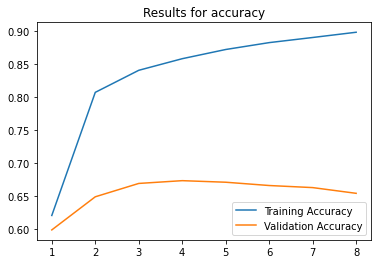

In [43]:
# Ploting the accuracy metric across the epochs

for i in ['accuracy']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [44]:
score = model.evaluate(X_test_seq_padded,y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.859397828578949
Test accuracy: 0.6732490658760071


In [45]:
test_pred_raw = model.predict(X_test_seq_padded)
test_pred = np.argmax(test_pred_raw, axis=1)

119/119 [==============================] - 3s 21ms/step


In [49]:
a = np.array(y_test)


In [67]:
test_data = [np.where(r==1)[0][0] for r in a]

In [68]:
cm = tf.math.confusion_matrix(test_data, test_pred)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1115,  224,  294],
       [ 148,  343,  128],
       [ 310,  137, 1099]])>

<AxesSubplot:>

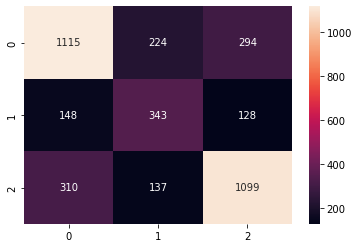

In [70]:
sns.heatmap(cm, annot=True,fmt='g')

In [71]:
test_data

[0,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,


In [72]:
test_pred

array([1, 2, 2, ..., 1, 0, 2], dtype=int64)